In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, SimpleRNN
from keras import Sequential
from collections import deque
from keras.optimizers import Adam

## Create Dataset

In [2]:
t = np.arange(0, 1500)
x = np.sin(0.02 * t) + np.random.rand(1500) * 1.5

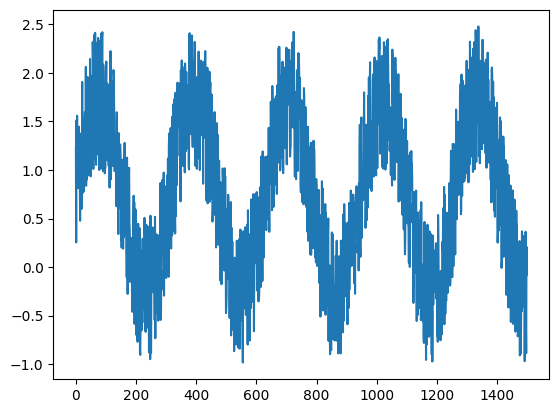

In [3]:
plt.plot(t, x)

### Train/Test Split

In [4]:
x_train = x[:1000]
x_test = x[1000:]
x.shape

(1500,)

- This function is for preparing time series data for training, where to predict the next value in the sequence given a fixed window of past values.

In [5]:
def convertToDataset(data, step):
    X, Y = [], []
    for i in range(len(data) - step):
        X.append(data[i:i+step])
        Y.append(data[i+step])
    return np.array(X), np.array(Y)


In [6]:
X_test, y_test = convertToDataset(x_test, 10)
X_train, y_train = convertToDataset(x_train, 10)

In [7]:
print(X_test.shape)
print(X_train.shape)

(490, 10)
(990, 10)


In [8]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1) #(Batch_size, sequence len, number of features)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1) #(Batch_size, sequence len, number of features)

In [9]:
print(X_test.shape)
print(X_train.shape)

(490, 10, 1)
(990, 10, 1)


## Create Simple RNN Model

In [18]:
model = Sequential()
model.add(SimpleRNN(units=64, activation='tanh'))
model.add(Dense(1))

optimizer = Adam(learning_rate=7e-3)
model.compile(optimizer=optimizer, loss='mse')

In [11]:
model.fit(X_train, y_train, epochs=200, batch_size=64)

Epoch 1/200
16/16 [==============================] - 4s 10ms/step - loss: 0.3912
Epoch 2/200
16/16 [==============================] - 0s 11ms/step - loss: 0.2557
Epoch 3/200
16/16 [==============================] - 0s 9ms/step - loss: 0.2375
Epoch 4/200
16/16 [==============================] - 0s 8ms/step - loss: 0.2253
Epoch 5/200
16/16 [==============================] - 0s 9ms/step - loss: 0.2115
Epoch 6/200
16/16 [==============================] - 0s 9ms/step - loss: 0.2130
Epoch 7/200
16/16 [==============================] - 0s 9ms/step - loss: 0.2173
Epoch 8/200
16/16 [==============================] - 0s 9ms/step - loss: 0.2230
Epoch 9/200
16/16 [==============================] - 0s 9ms/step - loss: 0.2161
Epoch 10/200
16/16 [==============================] - 0s 11ms/step - loss: 0.2089
Epoch 11/200
16/16 [==============================] - 0s 8ms/step - loss: 0.2110
Epoch 12/200
16/16 [==============================] - 0s 8ms/step - loss: 0.2236
Epoch 13/200
16/16 [==============

## Evaluate

In [12]:
model.evaluate(X_test, y_test)

16/16 [==============================] - 0s 3ms/step - loss: 0.3564


0.3563620150089264

In [13]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
pred = np.concatenate((train_pred, test_pred), axis=0)

16/16 [==============================] - 0s 3ms/step


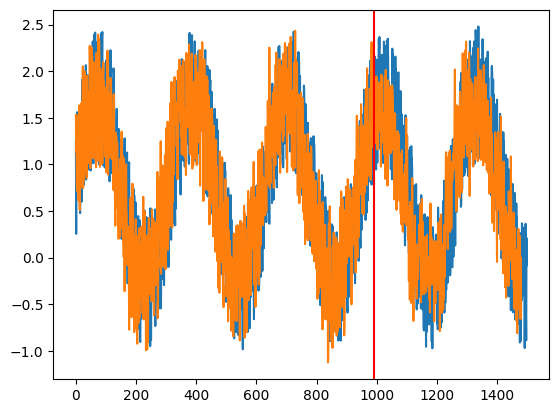

In [14]:
plt.plot(x)
plt.plot(pred)
plt.axvline(len(X_train), c="r")